In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [3]:
df=pd.read_csv(r'C:\Users\dear\Desktop\Data\Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df_final=df.drop(columns='Id')

In [10]:
df_final.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


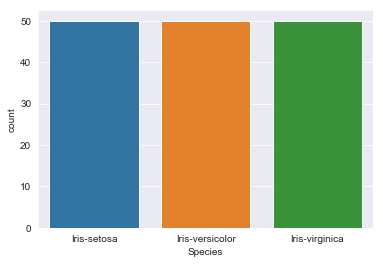

In [11]:
sns.countplot(x='Species',data=df)

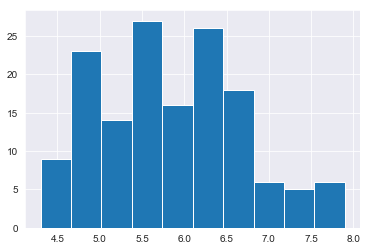

In [13]:
df['SepalLengthCm'].hist()

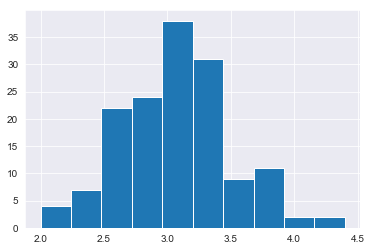

In [14]:
df['SepalWidthCm'].hist()

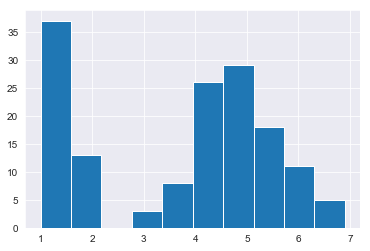

In [15]:
df['PetalLengthCm'].hist()

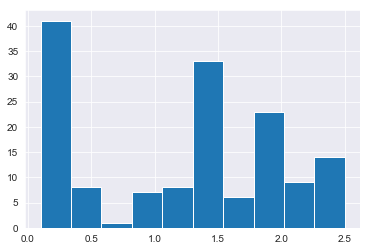

In [16]:
df['PetalWidthCm'].hist()

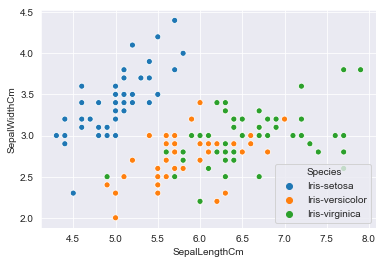

In [18]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df,hue='Species')

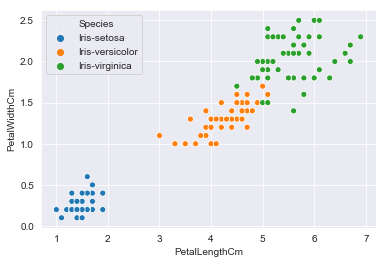

In [19]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=df,hue='Species')

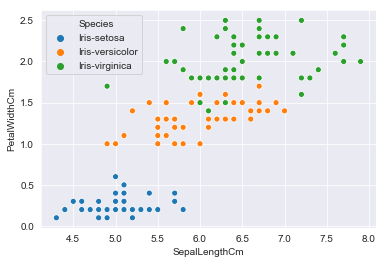

In [20]:
sns.scatterplot(x='SepalLengthCm',y='PetalWidthCm',data=df,hue='Species')

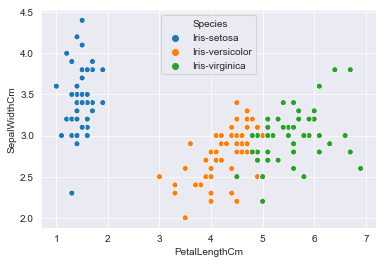

In [21]:
sns.scatterplot(x='PetalLengthCm',y='SepalWidthCm',data=df,hue='Species')

In [23]:
df_final.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'),axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.0,-0.11,0.87,0.82
SepalWidthCm,-0.11,1.0,-0.42,-0.36
PetalLengthCm,0.87,-0.42,1.0,0.96
PetalWidthCm,0.82,-0.36,0.96,1.0


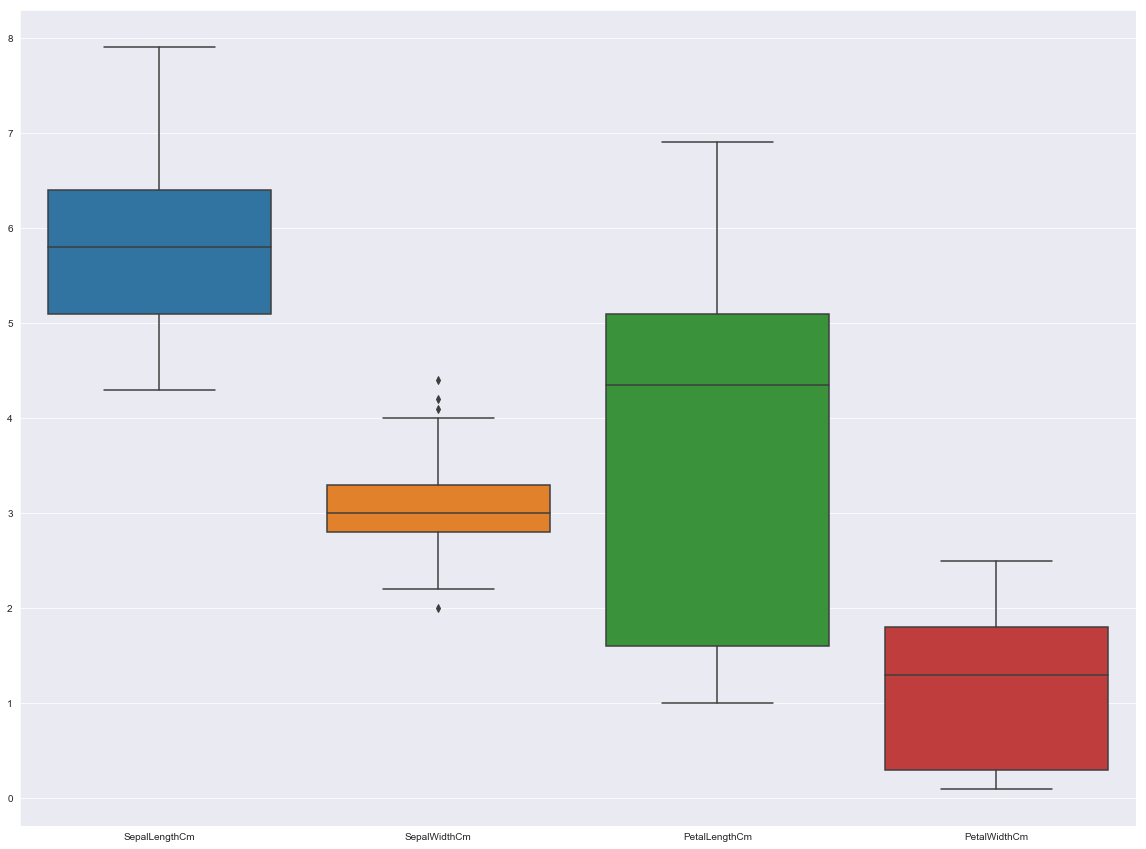

In [24]:
sns.boxplot(data=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
fig=plt.gcf()
fig.set_size_inches(20,15)

In [25]:
from sklearn.model_selection import train_test_split
X=df_final.drop(['Species'],axis=1)
Y=df_final['Species']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.50,random_state=101)

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
pred_DT=dtree.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(Y_test,pred_DT)

0.9733333333333334

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
print(confusion_matrix(Y_test,pred_DT))
print(classification_report(Y_test,pred_DT))

[[23  0  0]
 [ 0 30  1]
 [ 0  1 20]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.97      0.97      0.97        31
 Iris-virginica       0.95      0.95      0.95        21

      micro avg       0.97      0.97      0.97        75
      macro avg       0.97      0.97      0.97        75
   weighted avg       0.97      0.97      0.97        75



In [32]:
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier()
rfr.fit(X_train,Y_train)

C:\Users\dear\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
pred_rfr=rfr.predict(X_test)

In [34]:
accuracy_score(Y_test,pred_rfr)

0.96

In [35]:
print(confusion_matrix(Y_test,pred_rfr))
print(classification_report(Y_test,pred_rfr))

[[23  0  0]
 [ 0 30  1]
 [ 0  2 19]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.94      0.97      0.95        31
 Iris-virginica       0.95      0.90      0.93        21

      micro avg       0.96      0.96      0.96        75
      macro avg       0.96      0.96      0.96        75
   weighted avg       0.96      0.96      0.96        75

